In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [50]:
# Carregando o conjunto de dados
df = pd.read_csv('wine-clustering.csv')

# Exibindo as primeiras linhas do conjunto de dados para entender sua estrutura
print(df.head())



   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [51]:
# Selecionando os atributos para plotagem
x_axis = df['Malic_Acid']
y_axis = df['Proline']
z_axis = df['Alcohol'] 

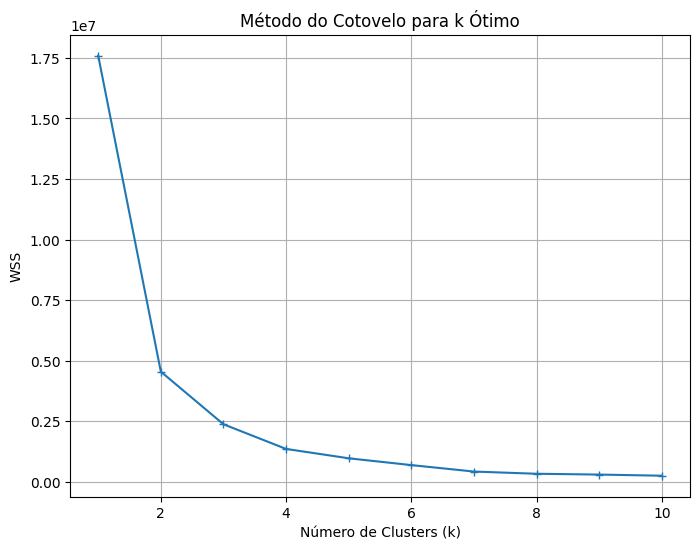

In [52]:
# Método do Cotovelo para encontrar o número ótimo de clusters
K = range(1, 11)
wss = []
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=200)
    kmeans = kmeans.fit(df)
    wss.append(kmeans.inertia_)

meus_centros = pd.DataFrame({'Clusters': K, 'WSS': wss})

plt.figure(figsize=(8, 6))
plt.plot(meus_centros['Clusters'], meus_centros['WSS'], marker="+")
plt.title('Método do Cotovelo para k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WSS')
plt.grid(True)
plt.show()

In [53]:
# Calcular Silhouette Score para diferentes valores de k
SK = range(2, 11)
sil_score = []
for i in SK:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=200)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels, metric="euclidean")
    sil_score.append(score)
    print("Silhouette score para k (clusters) =", i, "é", score)


Silhouette score para k (clusters) = 2 é 0.6568536504294317
Silhouette score para k (clusters) = 3 é 0.571138193786884
Silhouette score para k (clusters) = 4 é 0.5669477723599623
Silhouette score para k (clusters) = 5 é 0.5047578949506594
Silhouette score para k (clusters) = 6 é 0.5152100963080035
Silhouette score para k (clusters) = 7 é 0.5562199831144722
Silhouette score para k (clusters) = 8 é 0.5486213604076133
Silhouette score para k (clusters) = 9 é 0.5303955321562004
Silhouette score para k (clusters) = 10 é 0.515135480752716


In [54]:
# Escolher o número ótimo de clusters com base no Silhouette Score
optimal_k = np.argmax(sil_score) + 2  # Adiciona 2 porque range começa em 2
print("Número ótimo de clusters baseado no Silhouette Score:", optimal_k)

Número ótimo de clusters baseado no Silhouette Score: 2


In [55]:
# Realizar clustering KMeans com k ótimo
kmeans_optimal = KMeans(n_clusters=optimal_k, init="k-means++", random_state=200)
kmeans_optimal.fit(df[['Malic_Acid', 'Proline', 'Ash']])
df['Clusters'] = kmeans_optimal.labels_

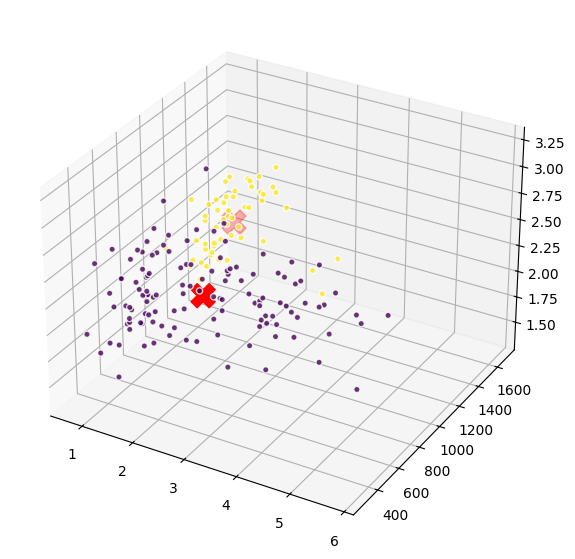

In [56]:
# Plotando o gráfico de dispersão 3D com os clusters coloridos
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Malic_Acid'], df['Proline'], df['Ash'], c=df['Clusters'], cmap='viridis', alpha=0.8, edgecolors='w')
ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')

In [57]:
# Adicionando rótulos e título
ax.set_title('Agrupamento K-Means: Ácido Málico vs Proline vs Ash')
ax.set_xlabel('Ácido Málico')
ax.set_ylabel('Proline')
ax.set_zlabel('Ash')
ax.legend()
plt.show()

In [58]:
# Exibir as primeiras linhas do conjunto de dados com os clusters atribuídos
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Clusters  
0   3.92     1065         1  
1   3.40     1050         1  
2 

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

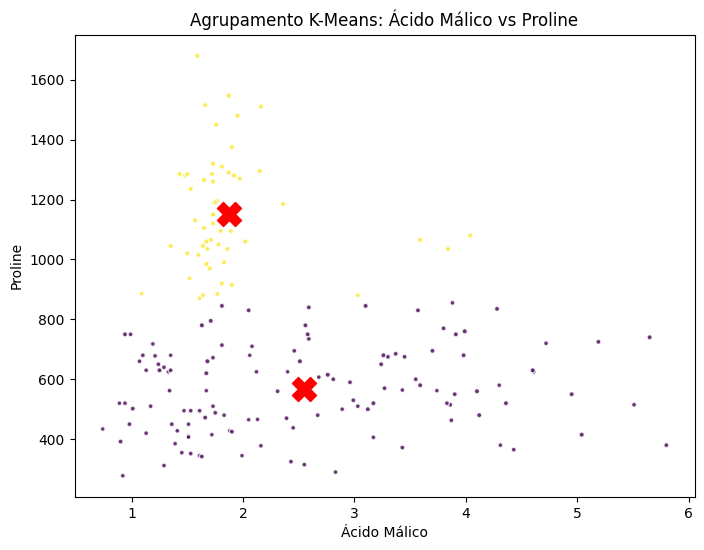

In [59]:
# Plotando o gráfico de dispersão com os clusters coloridos
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_axis,z_axis,c=df['Clusters'], cmap='viridis', alpha=0.8, edgecolors='w')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Agrupamento K-Means: Ácido Málico vs Proline')
plt.xlabel('Ácido Málico')
plt.ylabel('Proline')
plt.zlabel('Alcohol')
plt.legend()
plt.grid(True)
plt.show()
